# Проект

Цель проекта: научиться предсказывать цену б/у авто, основываясь на её параметрах. Используются датасеты, в которых:

- model - модель автомобиля;
- year - год производства;
- price - стоимость (в великобританских фунтах);
- transmission - тип коробки передач;
- mileage - пробег (в милях);
- fuelType - тип топлива;
- tax - налог на авто;
- mpg - расход топлива (мили/галлоны);
- engineSize - объём двигателя;

In [1]:
import numpy as np, pandas as pd, csv, random
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

csvs1 = ['audi.csv', 
        'bmw.csv', 
        'cclass.csv', 
        'focus.csv', 
        'ford.csv', 
        'hyundi.csv', 
        'merc.csv', 
        'skoda.csv', 
        'toyota.csv', 
        'vauxhall.csv', 
        'vw.csv']

csvs = ['C:/Users/lilpu/OneDrive/Рабочий стол/мл проект/audi.csv', 
        'C:/Users/lilpu/OneDrive/Рабочий стол/мл проект/bmw.csv', 
        'C:/Users/lilpu/OneDrive/Рабочий стол/мл проект/cclass.csv', 
        'C:/Users/lilpu/OneDrive/Рабочий стол/мл проект/focus.csv', 
        'C:/Users/lilpu/OneDrive/Рабочий стол/мл проект/ford.csv', 
        'C:/Users/lilpu/OneDrive/Рабочий стол/мл проект/hyundi.csv', 
        'C:/Users/lilpu/OneDrive/Рабочий стол/мл проект/merc.csv', 
        'C:/Users/lilpu/OneDrive/Рабочий стол/мл проект/skoda.csv', 
        'C:/Users/lilpu/OneDrive/Рабочий стол/мл проект/toyota.csv', 
        'C:/Users/lilpu/OneDrive/Рабочий стол/мл проект/vauxhall.csv', 
        'C:/Users/lilpu/OneDrive/Рабочий стол/мл проект/vw.csv']
# тут не знаю почему, но необходимо написать полный путь до каждого файла
# если сработает, можно раскомментить строчку ниже
# csvs = csvs1

sizes = [10668, 10781, 3899, 5454, 17965, 4860, 13119, 6267, 6738, 13632, 15157] # 108540 машин
ss = 108540

print(sum(sizes))

df = pd.DataFrame()

for i in range(len(csvs)):
    dataf = pd.read_csv(csvs[i])  
    dataf.index = range(sizes[i])

    col = []

    for c in dataf.columns:
        col.append(c)

    subdf = pd.DataFrame()

    for i in col:
        if (i != 'tax(£)'):
            subdf[i] = dataf[i]
        else:
            subdf['tax'] = dataf[i]
    
    if (df.empty):
        df = subdf
    else:
        df = pd.concat([df, subdf], ignore_index = True)
        
col = ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']

df

108540


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


In [2]:
# проверка на наличие NaN
df.isna().sum()



model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             9353
mpg             9353
engineSize         0
dtype: int64

In [3]:
# заменяем NaN на среднее по столбцу

df1 = df.copy()

for ind in ['tax', 'mpg']:
    clm = df1[ind]
    clm.dropna()
    df1[ind] = df1[ind].fillna(clm.mean())

print('Ok!')

df1.isna().sum()

Ok!


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
# модели машин, тип коробки и топливо - это строки. нам такое не нужно, поэтому заменим их на числа.
df2 = df1.copy()
models = []
fuels = []
transms = []
for i in range(ss):
    m = df1['model'][i]
    if (m not in models):
        models.append(m)
    f = df1['fuelType'][i]
    if (f not in fuels):
        fuels.append(f)
    t = df1['transmission'][i]
    if (t not in transms):
        transms.append(t)

print(models, len(models))
print(fuels)
print(transms)

for i in range(len(models)):
    mask = df2['model'] == models[i]
    df2.loc[mask, 'model'] = int(i)  

for i in range(len(fuels)):
    mask = df2['fuelType'] == fuels[i]
    df2.loc[mask, 'fuelType'] = int(i)

for i in range(len(transms)):
    mask = df2['transmission'] == transms[i]
    df2.loc[mask, 'transmission'] = int(i)


df2 = df2.infer_objects()
print(df2.dtypes)

[' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2', ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5', ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7', ' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series', ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4', ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2', ' M3', ' M6', ' Z3', ' C Class', ' Focus', ' Fiesta', ' Puma', ' Kuga', ' EcoSport', ' C-MAX', ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge', ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang', ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka', ' Escort', ' Transit Tourneo', ' I20', ' Tucson', ' I10', ' IX35', ' I30', ' I40', ' Ioniq', ' Kona', ' Veloster', ' I800', ' IX20', ' Santa Fe', ' Accent', ' Terracan', ' Getz', ' Amica', ' SLK', ' S Class', ' SL CLASS', ' G Class', ' GLE Class', ' GLA Class', ' A Class', ' B Class', ' GLC Class', ' E Class', ' GL Class', '

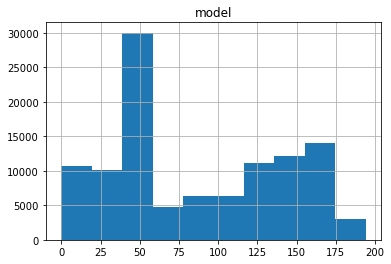

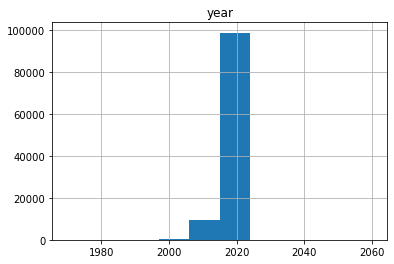

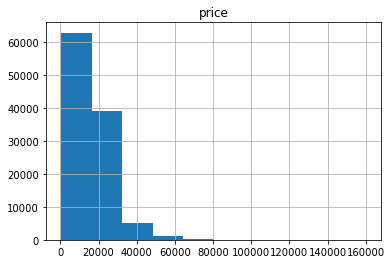

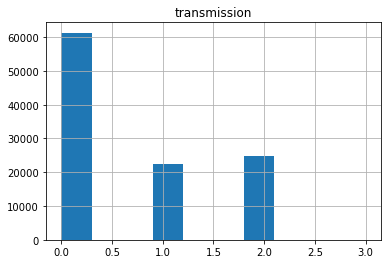

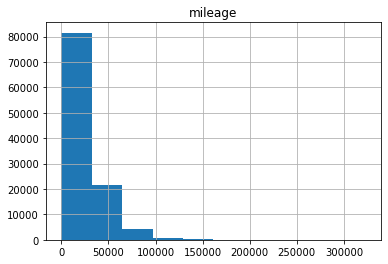

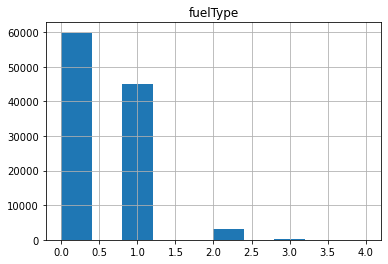

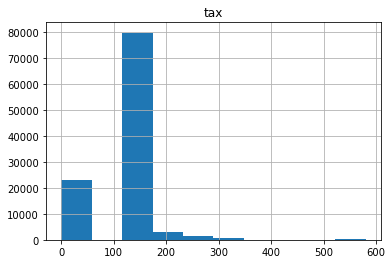

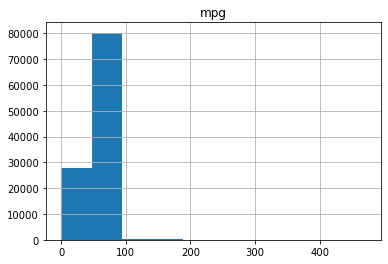

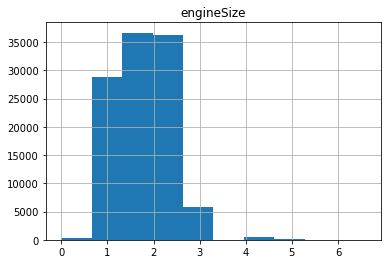

In [5]:
# теперь можно построить графики
for c in df2.columns:
    df2.hist(c)

In [23]:
# создадим 2 массива: один с предсказываемой величиной, другой - с предсказывающими
y = df2['price'].to_numpy()
# print(col)
colx = []
for c in col:
    if (c != 'price'):
        colx.append(c)
# print(colx)
x = df2[colx].to_numpy()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 0)

# создание модели
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

# вывод результата
RMSE = mean_squared_error(y_test, predictions, squared=False)
print("RMSE =", RMSE)

errors = 100 * (abs(predictions - y_test) / y_test)
acrc = 100 - np.mean(errors)
print("Accuracy = ", acrc, '%', sep = '')

RMSE = 4923.613007908187
Accuracy = 74.47236324405907%


<Figure size 360x216 with 0 Axes>

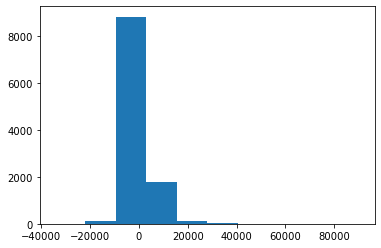

<Figure size 360x216 with 0 Axes>

In [26]:
plt.hist(y_test - predictions)
plt.figure(figsize=(5, 3))

Ну, погрешность в 26 процентов это беззаговорочно плохо. Однако, если предсказывать для всех моделей в общем, то это хорошо не кончится, поскольку одна модель автомобиля может быть сама по себе дороже, даже при равных остальных данных. Поэтому необходимо написать для каждой модели отдельную регрессию

In [10]:
# Создадим массив датафреймов dfm[i][j][k], где:
# i - номер модели;
# j - столбец;
# k - элемент;
dfm = []

for i in range(len(models)):
    _df = df2[df2['model'] == i]
    _df = _df.reset_index(drop=True) # чтобы не было индексации по типу 1200, 1205, 1212, 1293...
    dfm.append(_df)
    
# для проверки посмотрим датафрейм, полученный для модели номер 100:
dfm[100]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,100,2015,34129,1,13581,1,330.0,36.2,3.0
1,100,2007,7340,1,104000,1,570.0,28.8,3.0
2,100,2007,8490,1,74000,1,570.0,28.8,3.0
3,100,2016,35371,1,14253,1,325.0,36.2,3.0
4,100,2014,24498,1,67833,1,325.0,35.3,3.0
...,...,...,...,...,...,...,...,...,...
116,100,2016,31750,1,42000,1,260.0,42.8,3.0
117,100,2015,28700,1,61289,1,330.0,35.3,3.0
118,100,2016,35000,1,18091,1,330.0,36.2,3.0
119,100,2015,29865,1,45712,1,330.0,36.2,3.0


Count =  1347
RMSE = 1603.7812656904798
Accuracy = 90.63985778718391%



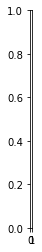

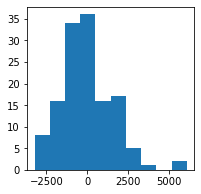

Count =  748
RMSE = 2927.321051448818
Accuracy = 88.70483330007978%



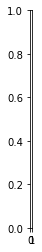

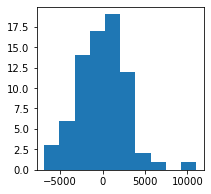

Count =  1381
RMSE = 3189.042522036831
Accuracy = 87.08365773643106%



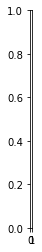

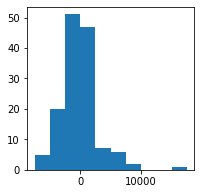

Count =  1929
RMSE = 2338.861169614366
Accuracy = 88.55721863463026%



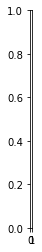

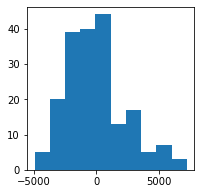

Count =  1417
RMSE = 2084.1222134419245
Accuracy = 93.35745455574458%



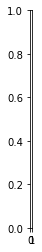

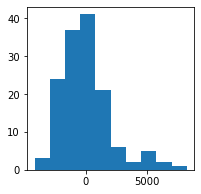

Count =  877
RMSE = 4749.126680365821
Accuracy = 87.47790815175762%



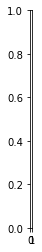

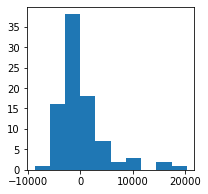

Count =  882
RMSE = 2858.871770462494
Accuracy = 88.75911712626402%



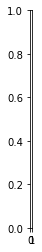

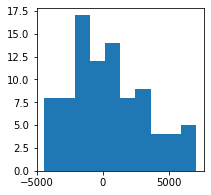

Count =  822
RMSE = 1668.7706311418503
Accuracy = 93.84026842646563%



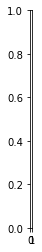

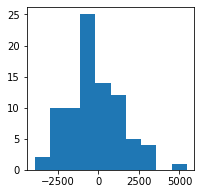

Count =  122
RMSE = 3456.8679205547264
Accuracy = 91.5032892113049%



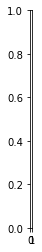

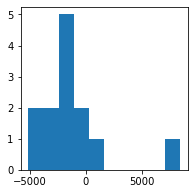

Count =  336
RMSE = 2579.041395331278
Accuracy = 89.23396772019728%



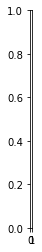

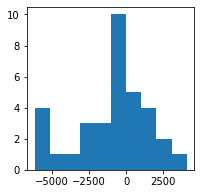

Count =  397
RMSE = 5920.878885515367
Accuracy = 90.19917950568203%



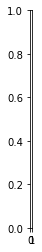

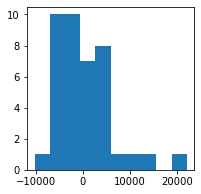

Count =  39
RMSE = 5296.952875421784
Accuracy = 90.2830130937209%



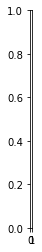

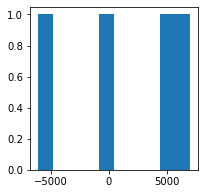

Count =  33
RMSE = 5641.348914364918
Accuracy = 88.91977573151411%



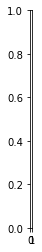

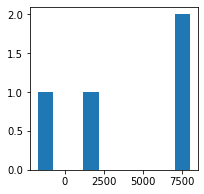

Count =  118
RMSE = 6624.124138045791
Accuracy = 78.67819220206039%



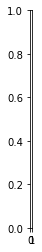

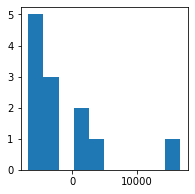

Count =  69
RMSE = 2743.5702661904825
Accuracy = 96.18571754266145%



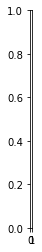

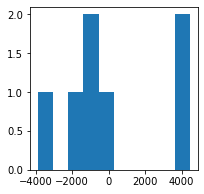

Count =  31
RMSE = 19778.31154354834
Accuracy = 40.51179466853108%



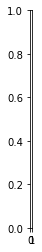

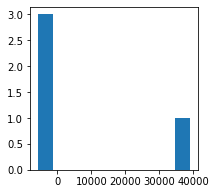

Count =  29
RMSE = 4500.1257523067525
Accuracy = 92.58113513832507%



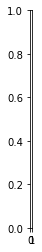

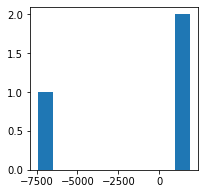

Count =  28
RMSE = 19567.903769139997
Accuracy = 81.55270981806632%



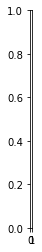

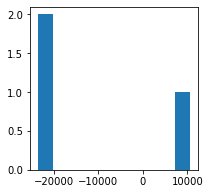

Count =  1056
RMSE = 3560.5785100939443
Accuracy = 85.97679383366%



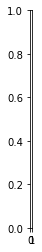

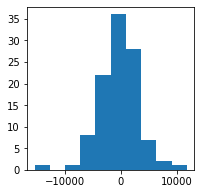

Count =  108
RMSE = 2213.957400838319
Accuracy = 91.90324624770496%



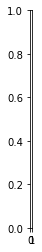

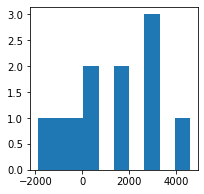

Count =  1969
RMSE = 2194.6582361159153
Accuracy = 89.49845571960215%



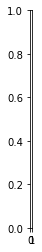

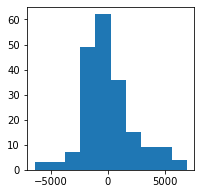

Count =  106
RMSE = 15102.690708826714
Accuracy = -50.72698444571526%



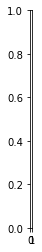

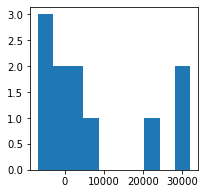

Count =  1229
RMSE = 10163.742340055203
Accuracy = 90.21879458778558%



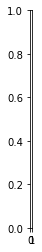

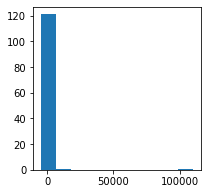

Count =  995
RMSE = 3626.1099596852923
Accuracy = 91.22933267971021%



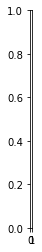

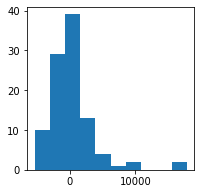

Count =  551
RMSE = 4409.636459003768
Accuracy = 86.357585129736%



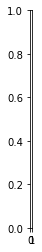

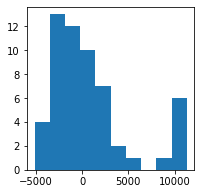

Count =  2443
RMSE = 3756.134334123014
Accuracy = 78.61656978711002%



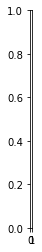

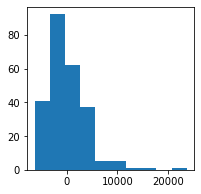

Count =  468
RMSE = 4130.67050238961
Accuracy = 87.07762636935328%



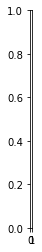

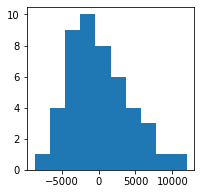

Count =  179
RMSE = 1926.2706471114507
Accuracy = 95.10117387868998%



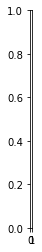

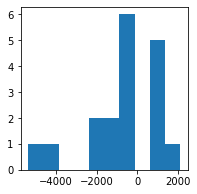

Count =  43
RMSE = 1267.3988716289898
Accuracy = 94.55789889062994%



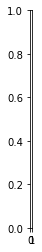

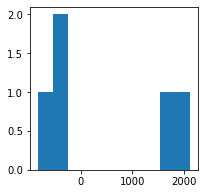

Count =  804
RMSE = 1477.8044772092992
Accuracy = 93.18459773949344%



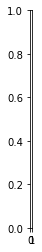

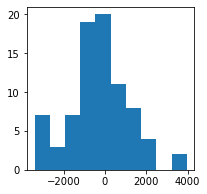

Count =  125
RMSE = 6747.8594937773605
Accuracy = 87.12827915591313%



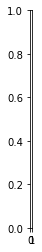

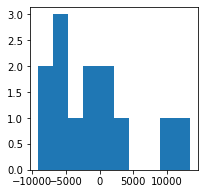

Count =  288
RMSE = 2949.0202901808684
Accuracy = 91.51806719264852%



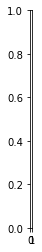

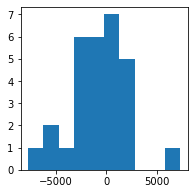

Count =  106
RMSE = 4681.812661117555
Accuracy = 85.63858752099105%



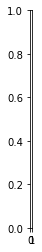

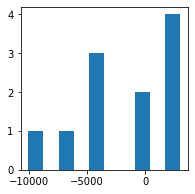

Count =  39
RMSE = 6206.971772950328
Accuracy = 92.13204294598668%



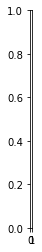

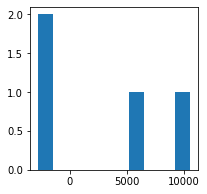

Count =  108
RMSE = 1421.4202719239274
Accuracy = 94.64432646891872%



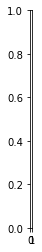

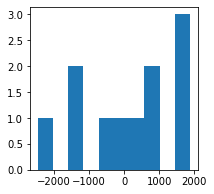

Count =  55
RMSE = 4363.516201787055
Accuracy = 95.89797406229751%



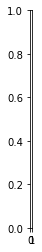

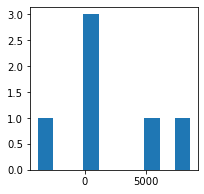

Count =  29
RMSE = 4993.6265235152405
Accuracy = 87.797852444516%



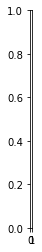

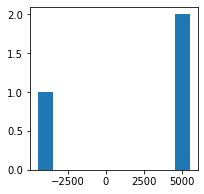

Count =  21
RMSE = 3303.114187139249
Accuracy = 93.47092922145718%



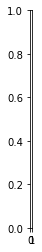

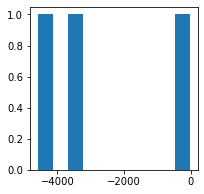

Count =  27
RMSE = 423.3577181902624
Accuracy = 98.67768397537117%



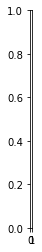

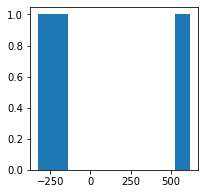

Count =  7646
RMSE = 4210.546285786335
Accuracy = 85.42062522864555%



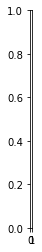

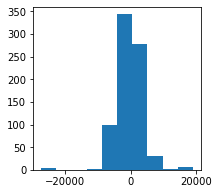

Count =  10042
RMSE = 1763.4124218452494
Accuracy = 87.32792414996027%



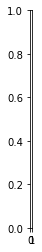

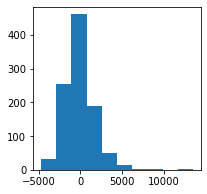

Count =  6557
RMSE = 1493.507860774034
Accuracy = 88.22800041126477%



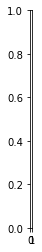

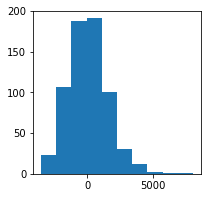

Count =  80
RMSE = 1861.1657796550817
Accuracy = 93.00589139686205%



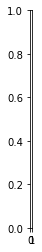

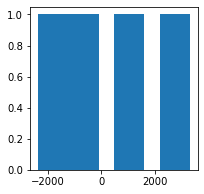

Count =  2225
RMSE = 1453.2852000908856
Accuracy = 92.16137844078919%



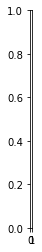

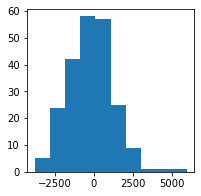

Count =  1143
RMSE = 1284.273339283345
Accuracy = 90.93143844621083%



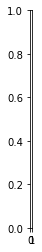

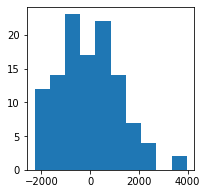

Count =  543
RMSE = 1117.087473364343
Accuracy = 89.4936975989896%



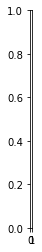

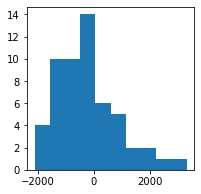

Count =  526
RMSE = 2001.9272932279885
Accuracy = 87.3752472210511%



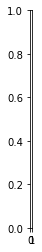

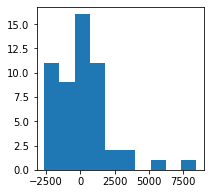

Count =  531
RMSE = 790.1154234163682
Accuracy = 93.60754717345361%



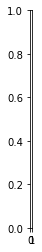

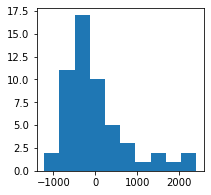

Count =  69
RMSE = 2009.490955782684
Accuracy = 92.37295170280044%



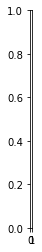

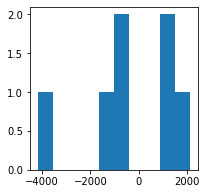

Count =  296
RMSE = 2759.6151997316783
Accuracy = 72.40520314968028%



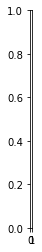

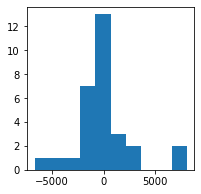

Count =  355
RMSE = 529.8795145345468
Accuracy = 94.77798343555858%



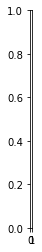

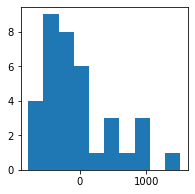

Count =  208
RMSE = 1158.5414577509832
Accuracy = 96.01908107358159%



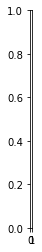

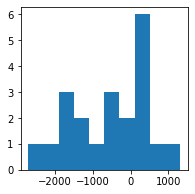

Count =  33
RMSE = 964.9375439446698
Accuracy = 94.76132385295642%



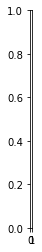

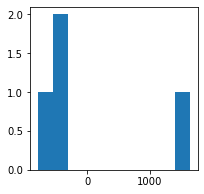

Count =  247
RMSE = 1344.6214994327079
Accuracy = 92.29263617454315%



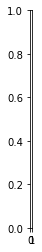

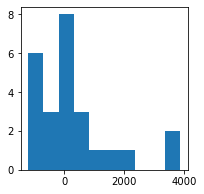

Count =  199
RMSE = 966.5245688673684
Accuracy = 73.2481378172671%



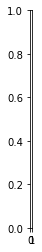

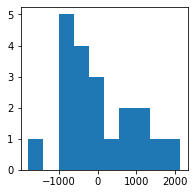

Count =  228
RMSE = 3156.799138279042
Accuracy = 75.13810311886508%



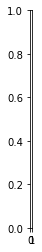

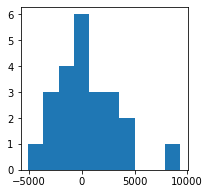

Count =  57
RMSE = 7102.318207223992
Accuracy = 89.39914036304154%



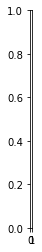

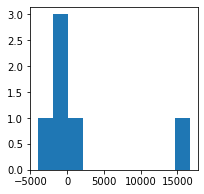

Count =  59
RMSE = 14036.38261810082
Accuracy = 42.30666602928445%



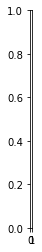

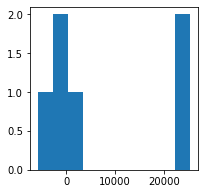

Count =  496
RMSE = 738.3624382993904
Accuracy = 93.14998838685251%



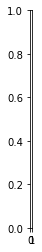

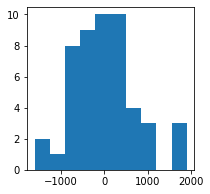

Count =  1300
RMSE = 1537.3971595449807
Accuracy = 92.46358286743772%



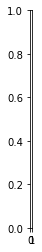

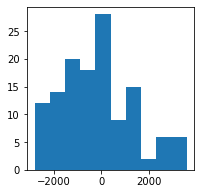

Count =  1092
RMSE = 836.120204383178
Accuracy = 91.5672584401014%



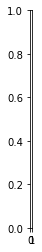

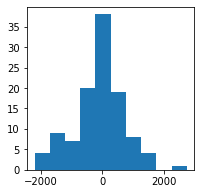

Count =  118
RMSE = 445.7899116889381
Accuracy = 95.06186344750013%



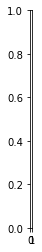

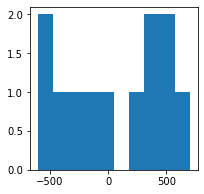

Count =  536
RMSE = 1488.7224559782026
Accuracy = 87.88159372423446%



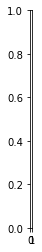

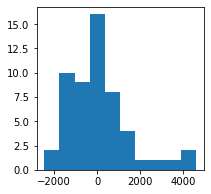

Count =  127
RMSE = 1524.7996884348213
Accuracy = 92.45911145947966%



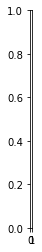

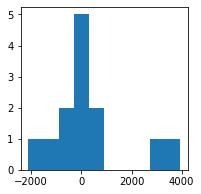

Count =  284
RMSE = 1858.3459735950878
Accuracy = 92.69936940900956%



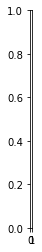

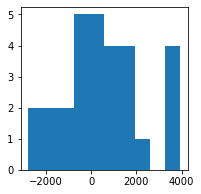

Count =  328
RMSE = 1296.4514853245623
Accuracy = 93.65851247840419%



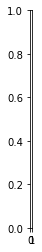

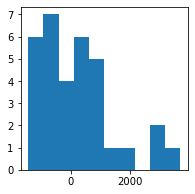

Count =  117
RMSE = 582.6837069032374
Accuracy = 97.00624174764441%



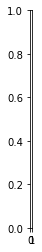

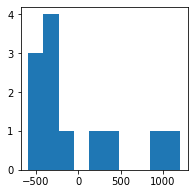

Count =  204
RMSE = 965.4994591661406
Accuracy = 92.92495145890814%



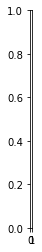

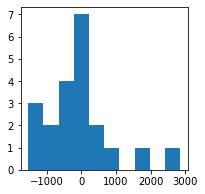

Count =  245
RMSE = 2445.637752679807
Accuracy = 94.4070966166978%



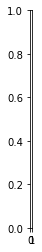

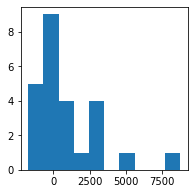

Count =  95
RMSE = 1699.0320103188017
Accuracy = 69.83771638162041%



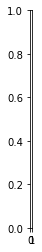

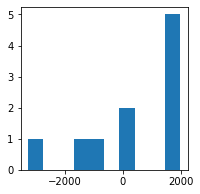

Count =  197
RMSE = 11648.017722919592
Accuracy = 67.1329365672608%



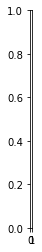

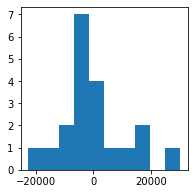

Count =  260
RMSE = 5629.496249736099
Accuracy = 81.96573055228653%



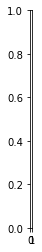

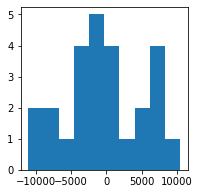

Count =  461
RMSE = 4266.414460986819
Accuracy = 90.5639479259301%



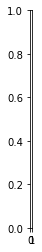

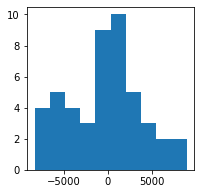

Count =  847
RMSE = 1858.1601370034261
Accuracy = 94.11400295819729%



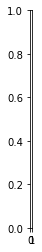

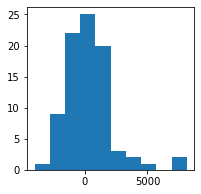

Count =  2561
RMSE = 5543.876851678543
Accuracy = 77.45218520684355%



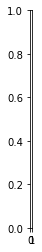

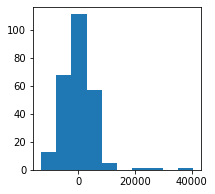

Count =  591
RMSE = 1085.8643730716562
Accuracy = 94.58756381729731%



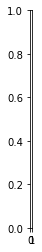

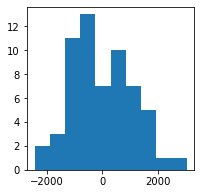

Count =  960
RMSE = 3970.5395141824047
Accuracy = 90.80438889301023%



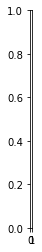

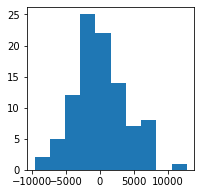

Count =  1953
RMSE = 4891.870313353317
Accuracy = 80.42788711753573%



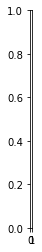

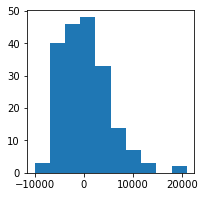

Count =  121
RMSE = 2438.272140720924
Accuracy = 88.81846304396672%



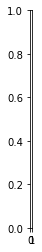

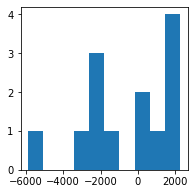

Count =  237
RMSE = 4467.072951675755
Accuracy = 88.64081410123678%



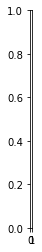

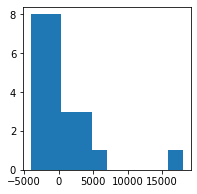

Count =  86
RMSE = 2273.6717293819106
Accuracy = 89.74944159377691%



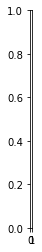

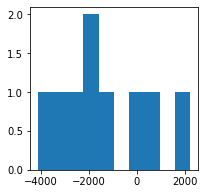

Count =  207
RMSE = 5196.365105590032
Accuracy = 86.55634478228518%



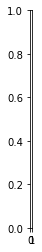

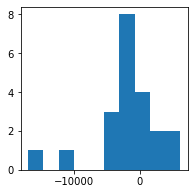

Count =  79
RMSE = 1825.56428102607
Accuracy = 90.212171550474%



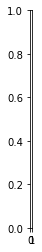

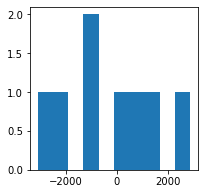

Count =  511
RMSE = 3999.091311099218
Accuracy = 91.8015119067357%



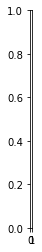

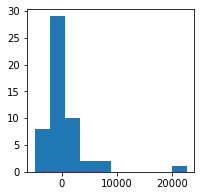

Count =  74
RMSE = 6227.869374425222
Accuracy = 93.30436545603787%



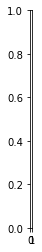

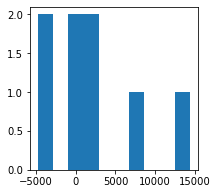

Count =  82
RMSE = 7023.868359841462
Accuracy = 82.67027000975861%



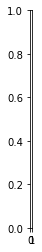

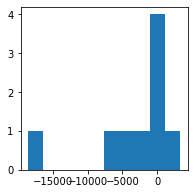

Count =  1477
RMSE = 1406.8314869358242
Accuracy = 92.0533590561937%



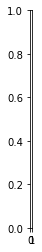

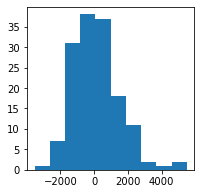

Count =  470
RMSE = 584.7888323095716
Accuracy = 93.64652945403715%



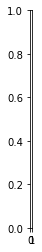

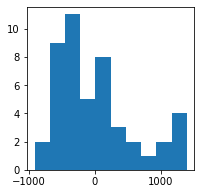

Count =  458
RMSE = 1020.3753621329729
Accuracy = 93.46341164963003%



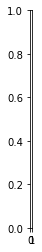

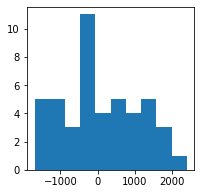

Count =  791
RMSE = 3284.108522301099
Accuracy = 86.81839660724562%



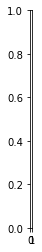

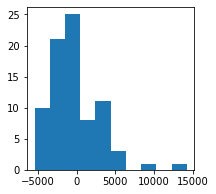

Count =  472
RMSE = 2568.022233313395
Accuracy = 89.92404764092915%



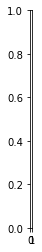

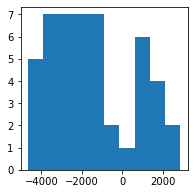

Count =  152
RMSE = 650.4763214429769
Accuracy = 92.53631028530711%



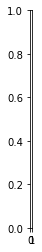

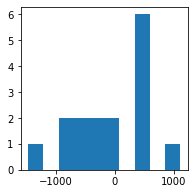

Count =  390
RMSE = 2054.1074597360594
Accuracy = 91.46969595831484%



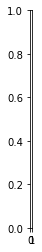

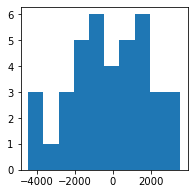

Count =  1571
RMSE = 1325.0597741505621
Accuracy = 88.13390849468003%



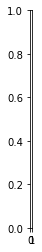

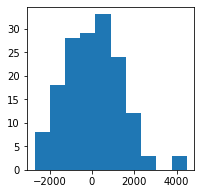

Count =  136
RMSE = 736.0324037549794
Accuracy = 94.52607728399862%



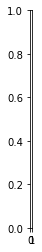

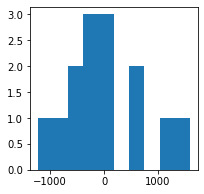

Count =  192
RMSE = 1520.2347810263961
Accuracy = 93.10807791248821%



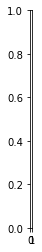

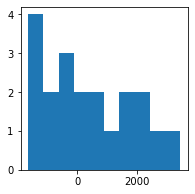

Count =  141
RMSE = 1562.3201242772025
Accuracy = 93.86402809945503%



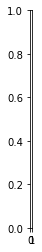

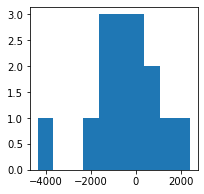

Count =  73
RMSE = 2286.179529455546
Accuracy = 90.7875560742204%



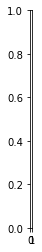

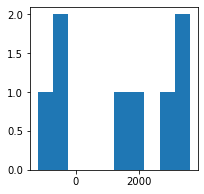

Count =  267
RMSE = 1539.9073796363807
Accuracy = 94.13502176065218%



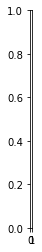

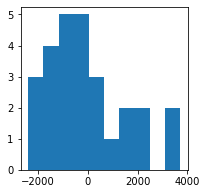

Count =  473
RMSE = 2263.038077404427
Accuracy = 82.76744693529933%



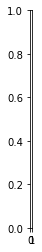

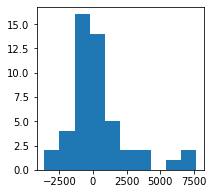

Count =  2122
RMSE = 800.9861942750747
Accuracy = 93.80830324693467%



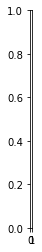

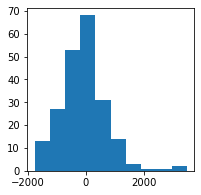

Count =  712
RMSE = 1409.1216409350154
Accuracy = 88.16480562406366%



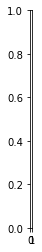

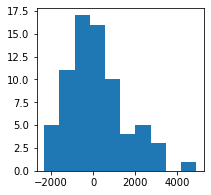

Count =  1961
RMSE = 799.2315437703488
Accuracy = 91.9034775346535%



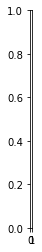

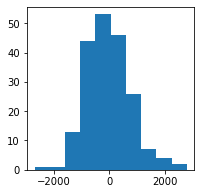

Count =  479
RMSE = 1560.4288793174703
Accuracy = 94.04986275919904%



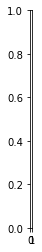

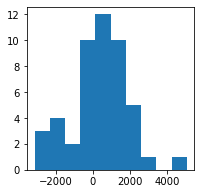

Count =  232
RMSE = 2586.7389439838494
Accuracy = 91.44104426164148%



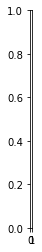

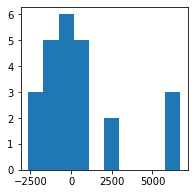

Count =  115
RMSE = 1118.8921559915952
Accuracy = 89.95629694648339%



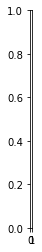

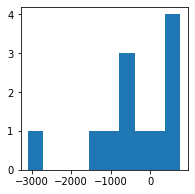

Count =  114
RMSE = 629.6330559571409
Accuracy = 95.44227839578146%



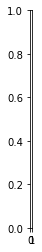

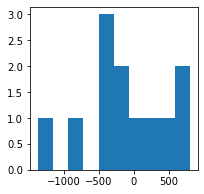

Count =  86
RMSE = 1700.833436676793
Accuracy = 93.47935835510764%



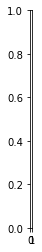

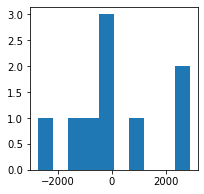

Count =  51
RMSE = 2876.3925636216027
Accuracy = 93.809802410582%



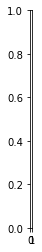

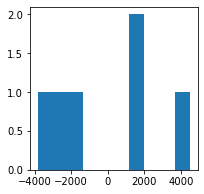

Count =  3441
RMSE = 1349.8577516020484
Accuracy = 86.37599526246235%



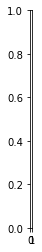

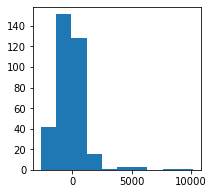

Count =  2805
RMSE = 1238.3799709270027
Accuracy = 86.93090396256576%



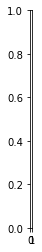

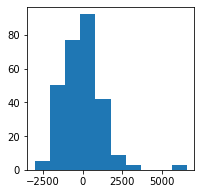

Count =  448
RMSE = 656.0604257382837
Accuracy = 93.55600227579292%



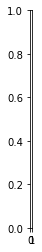

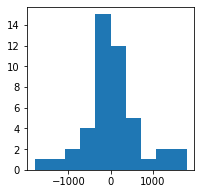

Count =  815
RMSE = 771.2379323894489
Accuracy = 93.21686537653353%



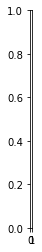

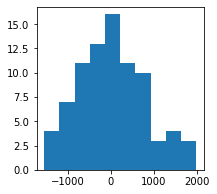

Count =  2127
RMSE = 1132.855552703072
Accuracy = 93.66821248735984%



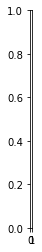

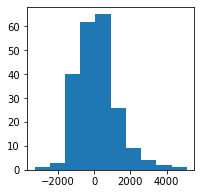

Count =  683
RMSE = 1393.656475830571
Accuracy = 91.17604084774378%



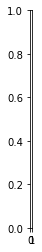

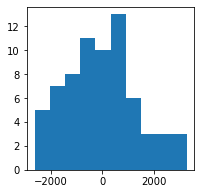

Count =  599
RMSE = 1205.1463596069623
Accuracy = 83.41920341237106%



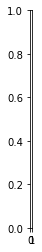

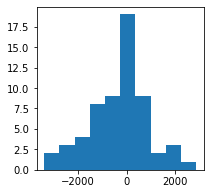

Count =  251
RMSE = 752.7841697810462
Accuracy = 88.30328516639092%



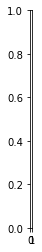

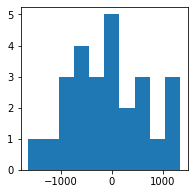

Count =  58
RMSE = 874.0263135937269
Accuracy = 93.591240635368%



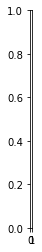

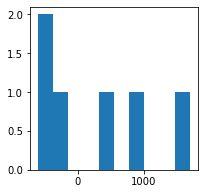

Count =  463
RMSE = 527.807237633752
Accuracy = 94.41008824894561%



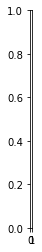

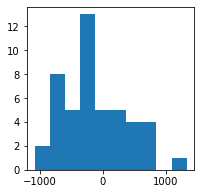

Count =  568
RMSE = 2009.6963197186824
Accuracy = 91.37079897313802%



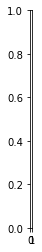

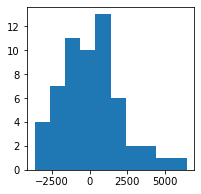

Count =  27
RMSE = 840.7947798359679
Accuracy = 89.24232439424125%



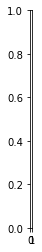

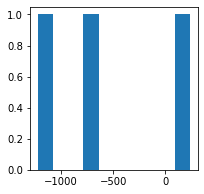

Count =  1030
RMSE = 1178.2734369288041
Accuracy = 89.91216511269623%



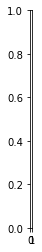

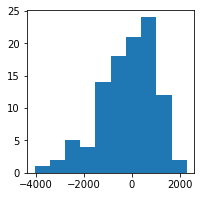

Count =  101
RMSE = 954.8739096700676
Accuracy = 91.02155231095362%



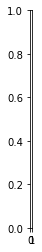

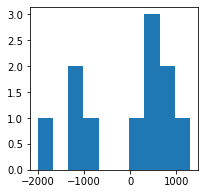

Count =  156
RMSE = 1161.5606744014037
Accuracy = 93.71514166387489%



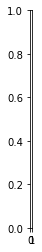

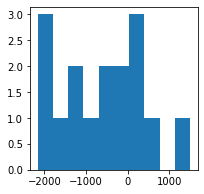

Count =  21
RMSE = 2581.1878675978246
Accuracy = 80.69202473223264%



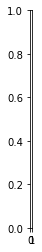

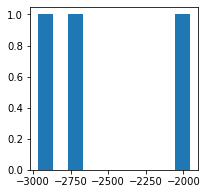

Count =  22
RMSE = 781.5434391337276
Accuracy = 87.50431384593398%



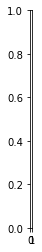

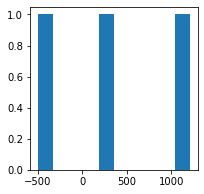

Count =  733
RMSE = 2439.8391040243355
Accuracy = 92.21053827607604%



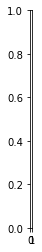

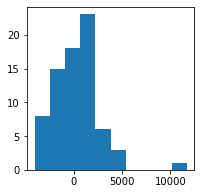

Count =  4863
RMSE = 2450.112714429951
Accuracy = 87.89485209706075%



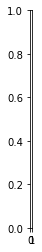

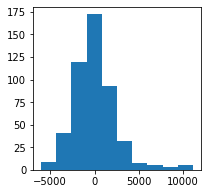

Count =  915
RMSE = 3629.948044085141
Accuracy = 85.11163900628515%



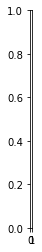

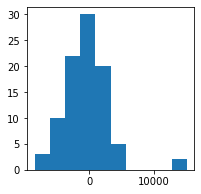

Count =  300
RMSE = 1712.144797788653
Accuracy = 93.42411942528337%



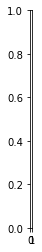

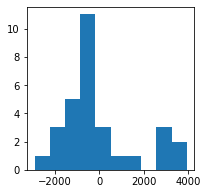

Count =  3287
RMSE = 1070.1640271573433
Accuracy = 91.35171618843987%



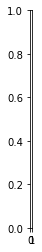

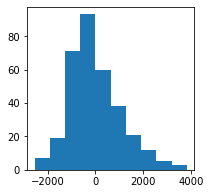

Count =  1765
RMSE = 2439.485952349756
Accuracy = 89.77989771754206%



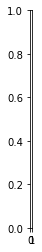

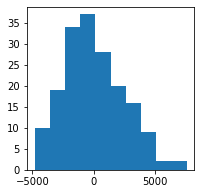

Count =  260
RMSE = 2839.5690597830385
Accuracy = 90.79753703986282%



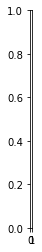

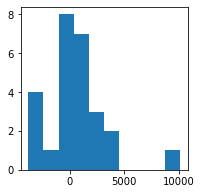

Count =  884
RMSE = 992.3048485317687
Accuracy = 90.6945942344596%



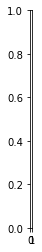

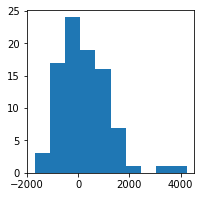

Count =  242
RMSE = 1000.9080515897
Accuracy = 93.8047519138122%



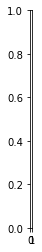

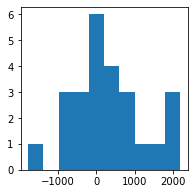

Count =  83
RMSE = 2278.485201030875
Accuracy = 71.17997280154698%



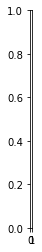

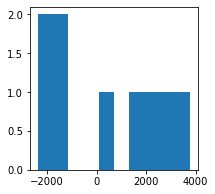

Count =  59
RMSE = 1613.646402361949
Accuracy = 92.32420978116073%



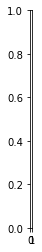

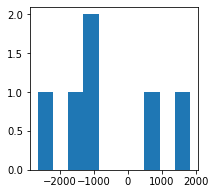

Count =  101
RMSE = 3489.4362794701988
Accuracy = 92.26025573124136%



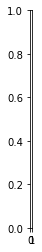

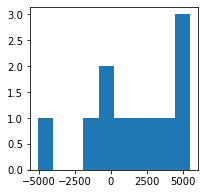

Count =  363
RMSE = 2563.9145590661756
Accuracy = 93.8510922350478%



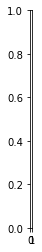

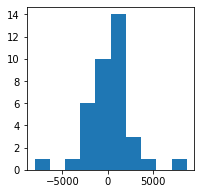

Count =  248
RMSE = 2781.46441981292
Accuracy = 92.71696038719834%



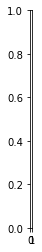

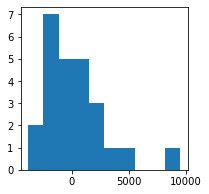

Count =  352
RMSE = 2060.287558343584
Accuracy = 92.71846296489794%



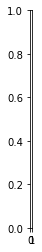

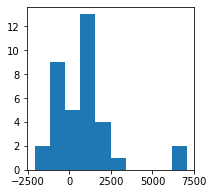

Count =  268
RMSE = 1270.529792730083
Accuracy = 93.31398414818021%



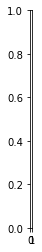

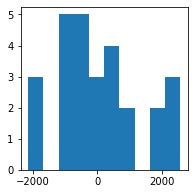

Count =  111
RMSE = 2546.0065919128956
Accuracy = 91.6207741280354%



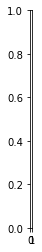

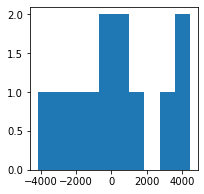

Count =  91
RMSE = 3469.5878330303062
Accuracy = 91.2617619608629%



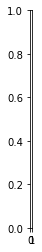

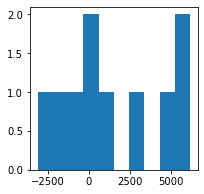

Count =  61
RMSE = 1000.0792257678893
Accuracy = 95.537165991459%



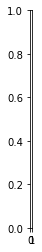

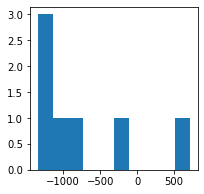

Count =  32
RMSE = 771.9879180796444
Accuracy = 93.88663179468962%



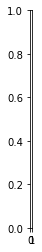

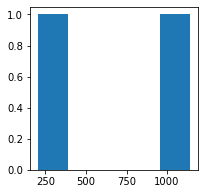

Count =  95
RMSE = 866.7577819736414
Accuracy = 92.80479835416435%



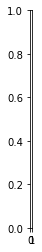

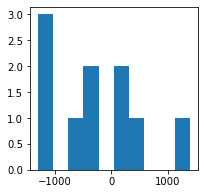

In [20]:
RMSEs = []
accuracies = []

for i in range(len(models)):
    
    dtf = dfm[i]
    # создадим 2 массива: один с предсказываемой величиной, другой - с предсказывающими
    y = dtf['price'].to_numpy()
    # если количество автомобилей соответствующей модели будет очень мало (меньше 20), то модель будет плохо обучена
    if (len(y) < 20):
        continue
    colx = []
    for c in col:
        if (c != 'price' and c != 'model'):
            colx.append(c)
    # print(colx)
    x = dtf[colx].to_numpy()
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 0)

    # создание модели
    model = linear_model.LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    # вывод результата
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    print('Count = ', len(y))
    print("RMSE =", RMSE)
    
    errors = 100 * (abs(predictions - y_test) / y_test)
    acrc = 100 - np.mean(errors)
    print("Accuracy = ", acrc, '%', sep = '')
    print()
    RMSEs.append(RMSE)
    accuracies.append(acrc)
    
    plt.subplot(1, len(models), i + 1)
    plt.figure(figsize=(3, 3))
    plt.hist(y_test - predictions)
    plt.show()

In [12]:
print('Count = ', ss)
print("Mean RMSE =", sum(RMSEs) / len(RMSEs))
print('Mean accuracy = ', sum(accuracies) / len(accuracies), '%', sep = '')

Count =  108540
Mean RMSE = 2878.9034470694255
Mean accuracy = 88.2728107760178%


Как видно, ошибка теперь составляет 12%, что намного лучше чем предыдущие 26%. Однако, если учитывать, что модели автомобилей могут быть разного года выпуска (а значит, и разных версий одной модели, а соответственно и цена будет различаться существенно), разной комплектации (тут они не учитываются), да и наценку барыг, регрессия, на мой взгляд, показывает очень даже неплохой результат.

Теперь осталось лишь создать модель на основе случайного леса

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# создаём наборы данных вновь для всех автомобилей

y = df2['price'].to_numpy()
colx = []
for c in col:
    if (c != 'price'):
        colx.append(c)
x = df2[colx].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 0)

print('Ok!')

Ok!


In [16]:
# Создаём дерево, обучаем его и получаем предсказания
rf = RandomForestRegressor(n_estimators = 900, random_state = 0) # 1000 деревьев, ибо на большее питон не соглашается
rf.fit(x_train, y_train);

predictions = rf.predict(x_test)

print('Ok!')

Ok!


(array([6.000e+00, 1.127e+03, 9.664e+03, 4.900e+01, 6.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-19104.49777778, -10391.96889815,  -1679.44001852,   7033.08886111,
         15745.61774074,  24458.14662037,  33170.6755    ,  41883.20437963,
         50595.73325926,  59308.26213889,  68020.79101852]),
 <a list of 10 Patch objects>)

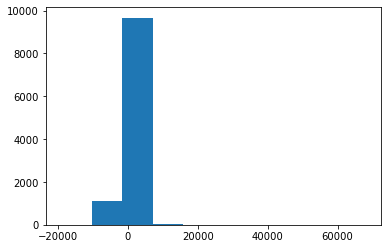

In [17]:
plt.hist(y_test - predictions)

In [18]:
# вывод результатов
RMSE = mean_squared_error(y_test, predictions, squared=False)
print("RMSE =", RMSE)
errors = 100 * (abs(predictions - y_test) / y_test)
acrc = 100 - np.mean(errors)
print("Accuracy = ", acrc, '%', sep = '')

RMSE = 1956.2047287376508
Accuracy = 92.81847762063978%


Используя случайный лес, модель улучшилась на 4,6%, и теперь погрешность составляет около 7%, что очень даже хорошо

Count =  1347
RMSE = 1143.7291633837388
Accuracy = 93.2886417977342%



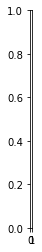

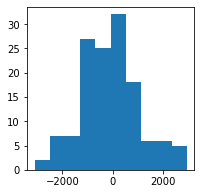

Count =  748
RMSE = 1994.0579789350666
Accuracy = 93.0257752511988%



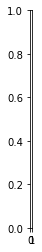

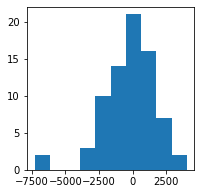

Count =  1381
RMSE = 2473.554410724864
Accuracy = 92.46683970055139%



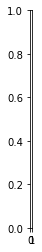

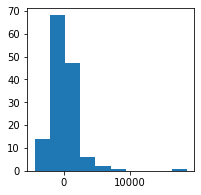

Count =  1929
RMSE = 1701.0443088321067
Accuracy = 91.46097776874494%



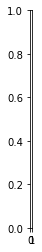

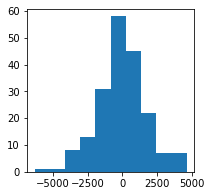

Count =  1417
RMSE = 1636.2241288395892
Accuracy = 94.8788860985095%



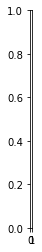

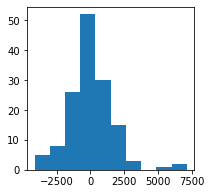

Count =  877
RMSE = 1892.4416059214066
Accuracy = 94.92631386580943%



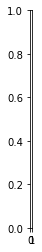

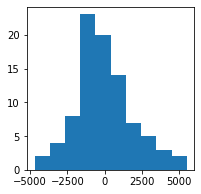

Count =  882
RMSE = 2650.2668138939157
Accuracy = 92.14779467000092%



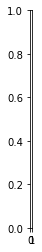

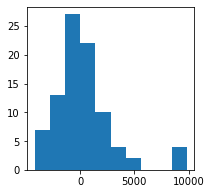

Count =  822
RMSE = 1644.550480297261
Accuracy = 94.50734950095807%



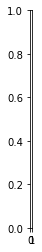

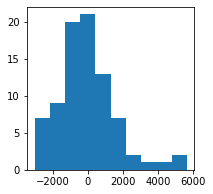

Count =  122
RMSE = 3709.766545423365
Accuracy = 91.99063983336431%



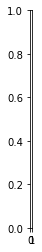

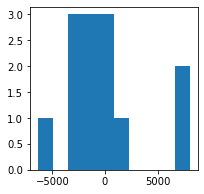

Count =  336
RMSE = 1959.2302865202535
Accuracy = 92.59973269471585%



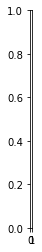

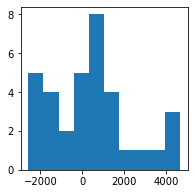

Count =  397
RMSE = 4198.765522301609
Accuracy = 92.79754816151014%



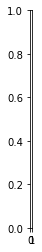

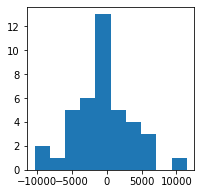

Count =  39
RMSE = 4288.029778260783
Accuracy = 91.50474632806754%



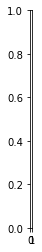

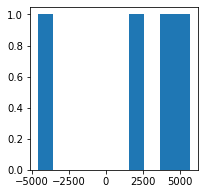

Count =  33
RMSE = 6646.804390988727
Accuracy = 86.23847647588339%



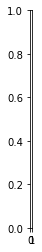

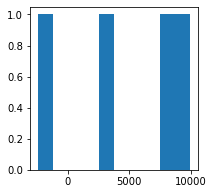

Count =  118
RMSE = 4491.809657647015
Accuracy = 92.11426057034606%



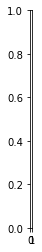

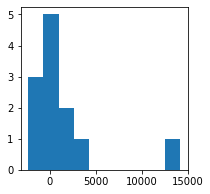

Count =  69
RMSE = 3646.331638820647
Accuracy = 94.74677975775701%



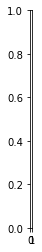

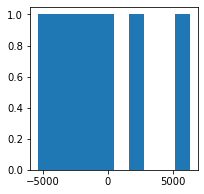

Count =  31
RMSE = 3367.192126039773
Accuracy = 89.28644669868737%



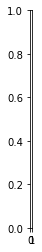

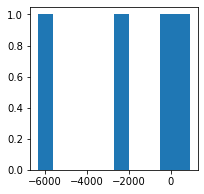

Count =  29
RMSE = 7119.975112745573
Accuracy = 85.2944490201642%



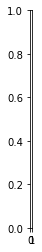

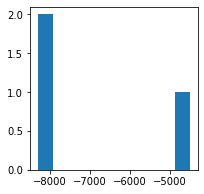

Count =  28
RMSE = 5980.520039886664
Accuracy = 94.79126261926532%



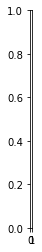

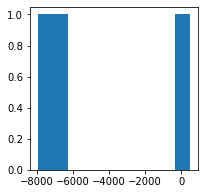

Count =  1056
RMSE = 2262.673331462295
Accuracy = 92.95233380718446%



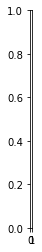

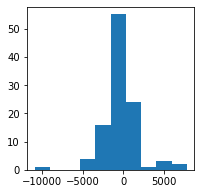

Count =  108
RMSE = 1619.5804016210209
Accuracy = 95.08182024646523%



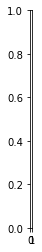

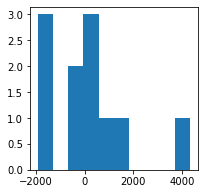

Count =  1969
RMSE = 1333.3756364208152
Accuracy = 93.95866796737336%



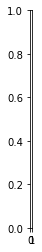

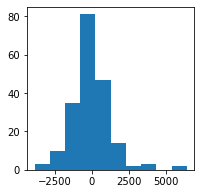

Count =  106
RMSE = 4873.489014022668
Accuracy = 56.6401335080939%



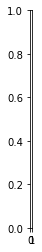

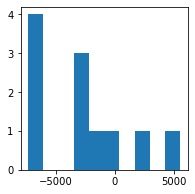

Count =  1229
RMSE = 10084.20282253072
Accuracy = 92.99092333258895%



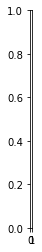

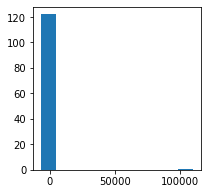

Count =  995
RMSE = 2815.1269599953926
Accuracy = 92.94790890512492%



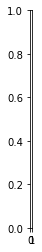

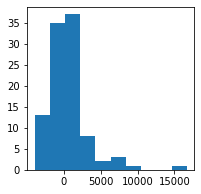

Count =  551
RMSE = 2605.2001918838328
Accuracy = 92.9915385636304%



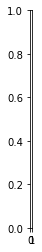

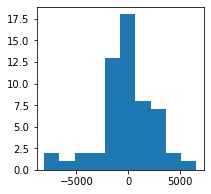

Count =  2443
RMSE = 2060.4631767475666
Accuracy = 91.1347868964862%



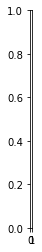

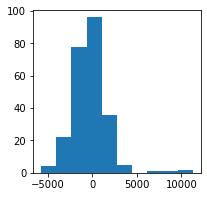

Count =  468
RMSE = 2202.2375151171527
Accuracy = 94.00282985821028%



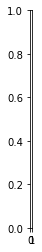

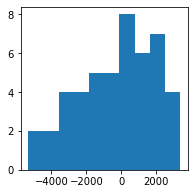

Count =  179
RMSE = 1396.2446690048632
Accuracy = 96.17104034255007%



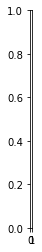

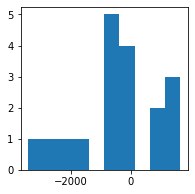

Count =  43
RMSE = 1698.8960180594925
Accuracy = 92.4282298209876%



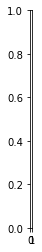

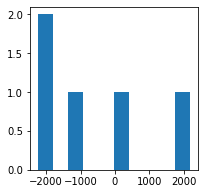

Count =  804
RMSE = 1317.896879222241
Accuracy = 94.86038045256676%



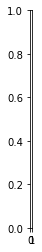

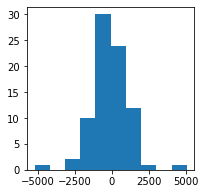

Count =  125
RMSE = 5934.084239046582
Accuracy = 89.01074905800444%



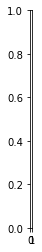

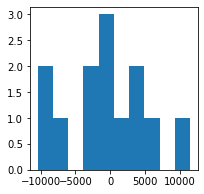

Count =  288
RMSE = 2279.145257394167
Accuracy = 94.42186879168283%



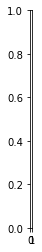

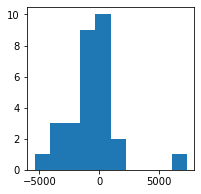

Count =  106
RMSE = 2202.1825630260337
Accuracy = 95.10764968568996%



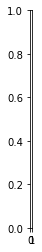

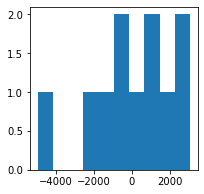

Count =  39
RMSE = 7486.363784651301
Accuracy = 89.02989144919371%



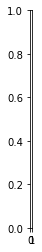

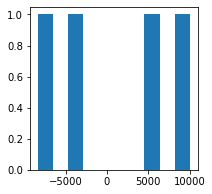

Count =  108
RMSE = 1556.999680226924
Accuracy = 93.72400391109569%



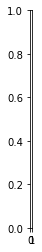

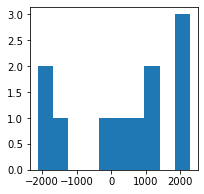

Count =  55
RMSE = 4954.457700331632
Accuracy = 95.14627356797521%



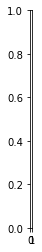

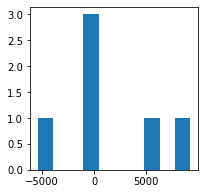

Count =  29
RMSE = 750.8623974775055
Accuracy = 98.20943475561566%



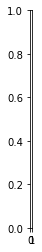

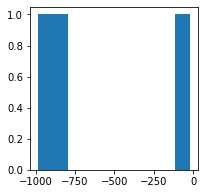

Count =  21
RMSE = 2357.1321763343426
Accuracy = 95.81768131832904%



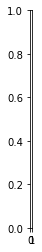

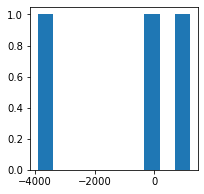

Count =  27
RMSE = 443.4371643998709
Accuracy = 98.39534564247506%



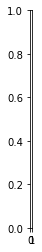

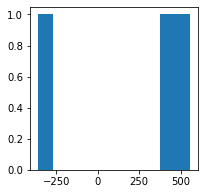

Count =  7646
RMSE = 2086.805761246084
Accuracy = 93.4172515754901%



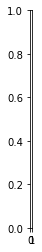

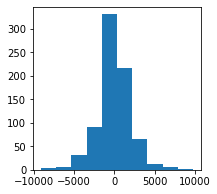

Count =  10042
RMSE = 1059.3671198975692
Accuracy = 94.76142421243608%



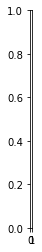

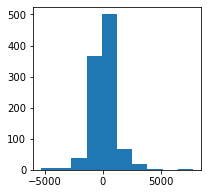

Count =  6557
RMSE = 992.6601216528521
Accuracy = 92.62628595007872%



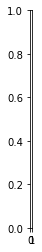

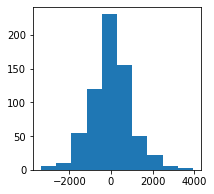

Count =  80
RMSE = 1761.3548048454068
Accuracy = 93.89666214379524%



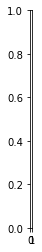

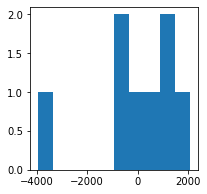

Count =  2225
RMSE = 1449.7547782239765
Accuracy = 92.53339209877477%



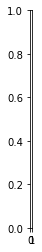

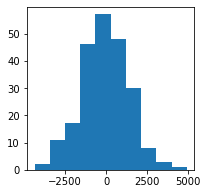

Count =  1143
RMSE = 1038.7321803436164
Accuracy = 94.12629681713919%



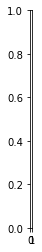

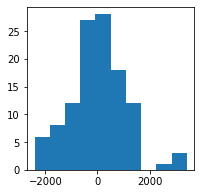

Count =  543
RMSE = 921.9818949018276
Accuracy = 92.4862141354968%



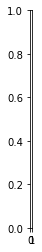

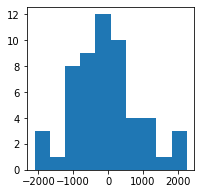

Count =  526
RMSE = 1358.1961585778245
Accuracy = 92.50920954983653%



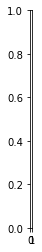

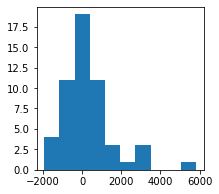

Count =  531
RMSE = 617.0965013957798
Accuracy = 95.03606447331617%



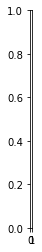

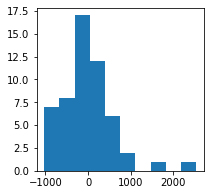

Count =  69
RMSE = 2125.610852045158
Accuracy = 91.40252522262317%



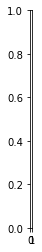

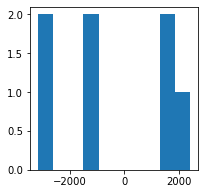

Count =  296
RMSE = 1588.564036140134
Accuracy = 89.26589590658486%



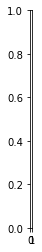

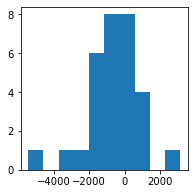

Count =  355
RMSE = 503.8943336313752
Accuracy = 94.91873369148743%



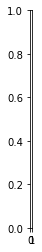

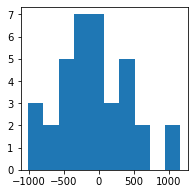

Count =  208
RMSE = 1009.7292305555459
Accuracy = 96.30970712051055%



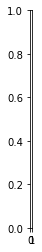

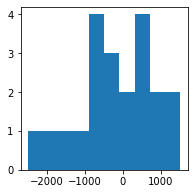

Count =  33
RMSE = 607.1921161788499
Accuracy = 96.782066551661%



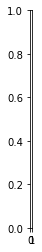

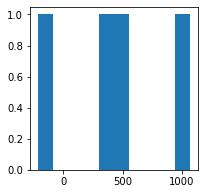

Count =  247
RMSE = 1296.6095303200575
Accuracy = 91.59501331430798%



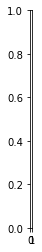

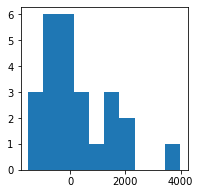

Count =  199
RMSE = 545.5776827687113
Accuracy = 88.75620147530891%



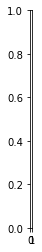

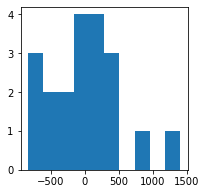

Count =  228
RMSE = 1691.2910468459347
Accuracy = 91.70441826564328%



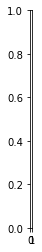

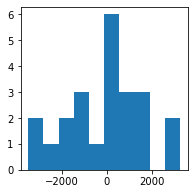

Count =  57
RMSE = 6478.623701130836
Accuracy = 91.14266372366981%



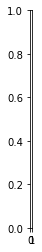

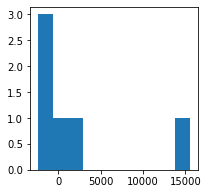

Count =  59
RMSE = 2398.932948261894
Accuracy = 90.21032090337033%



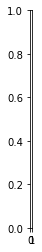

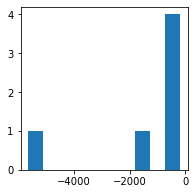

Count =  496
RMSE = 803.946733862046
Accuracy = 93.05701821156165%



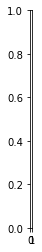

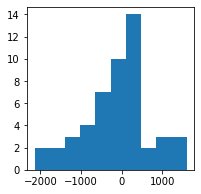

Count =  1300
RMSE = 1263.4144134428489
Accuracy = 94.26027859951685%



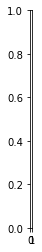

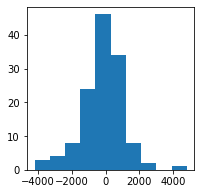

Count =  1092
RMSE = 675.4232321552007
Accuracy = 92.57776373396942%



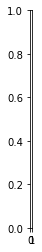

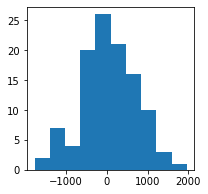

Count =  118
RMSE = 722.3235502981563
Accuracy = 92.701576313207%



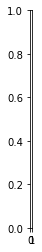

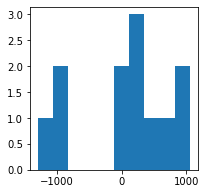

Count =  536
RMSE = 1069.2221943997993
Accuracy = 94.01449871870506%



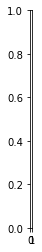

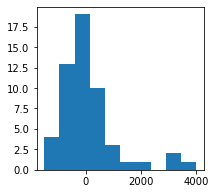

Count =  127
RMSE = 1237.8858962111244
Accuracy = 92.55215853666026%



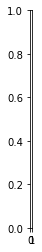

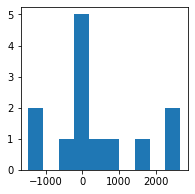

Count =  284
RMSE = 1728.233979399304
Accuracy = 94.63355721036281%



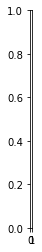

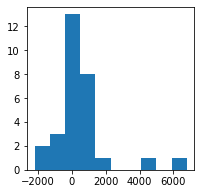

Count =  328
RMSE = 1419.1271381084568
Accuracy = 92.84700140271865%



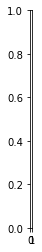

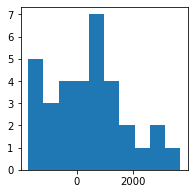

Count =  117
RMSE = 1127.3674648507101
Accuracy = 96.17018584618319%



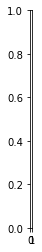

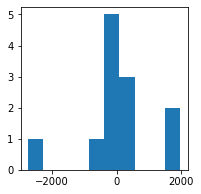

Count =  204
RMSE = 893.2952385697588
Accuracy = 92.49596078009024%



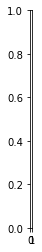

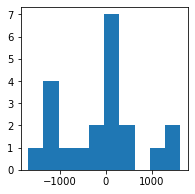

Count =  245
RMSE = 2355.835202831718
Accuracy = 93.74658636194435%



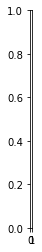

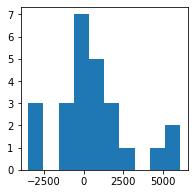

Count =  95
RMSE = 833.8438089207713
Accuracy = 90.3428867777996%



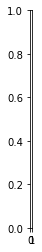

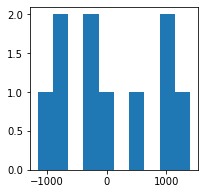

Count =  197
RMSE = 5995.556032585942
Accuracy = 81.44370606494799%



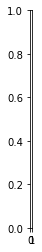

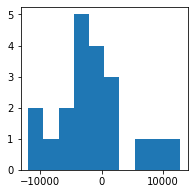

Count =  260
RMSE = 2974.5240793359058
Accuracy = 94.06602717873798%



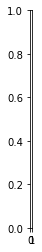

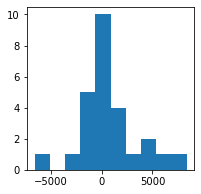

Count =  461
RMSE = 3236.8973791204508
Accuracy = 94.96398323342325%



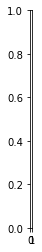

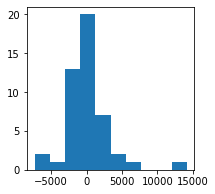

Count =  847
RMSE = 1137.1582870500063
Accuracy = 96.03224672247178%



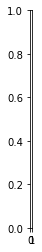

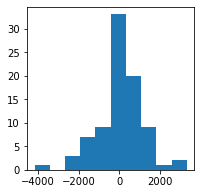

Count =  2561
RMSE = 1908.590924451606
Accuracy = 93.96873154389252%



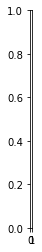

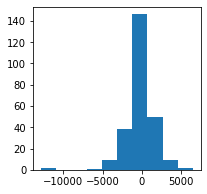

Count =  591
RMSE = 939.7957441847569
Accuracy = 95.81376332639226%



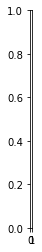

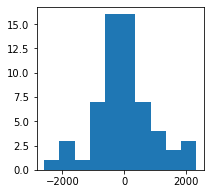

Count =  960
RMSE = 2753.1851468830864
Accuracy = 94.08502866993874%



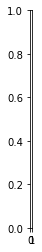

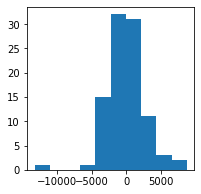

Count =  1953
RMSE = 2227.1029164499305
Accuracy = 94.75184992946018%



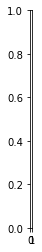

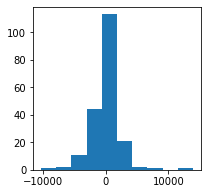

Count =  121
RMSE = 4256.732525354014
Accuracy = 78.50952427011696%



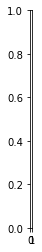

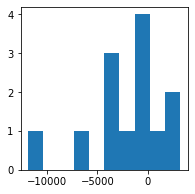

Count =  237
RMSE = 2934.7428860440373
Accuracy = 93.8105187602358%



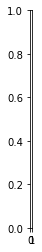

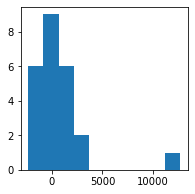

Count =  86
RMSE = 1536.6223060759671
Accuracy = 93.05026197092548%



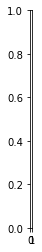

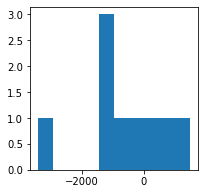

Count =  207
RMSE = 2643.190842194459
Accuracy = 93.75922068265739%



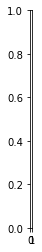

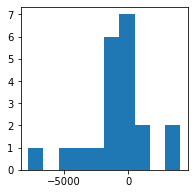

Count =  79
RMSE = 857.6084917362502
Accuracy = 95.43301345307405%



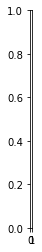

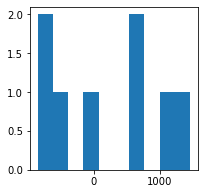

Count =  511
RMSE = 2568.4591845068244
Accuracy = 94.88531191877121%



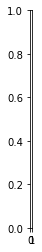

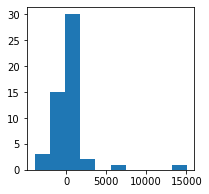

Count =  74
RMSE = 6760.721801614648
Accuracy = 91.79895025475412%



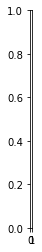

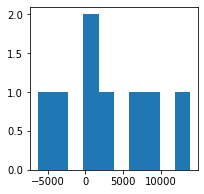

Count =  82
RMSE = 4609.423103287237
Accuracy = 85.32329953366266%



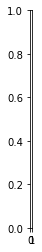

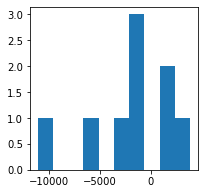

Count =  1477
RMSE = 1225.1856075079374
Accuracy = 93.8072517285411%



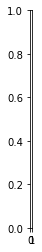

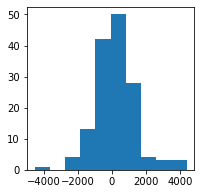

Count =  470
RMSE = 732.2863735432668
Accuracy = 91.74182687212478%



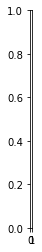

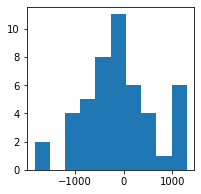

Count =  458
RMSE = 1114.2325108513717
Accuracy = 93.30638619495353%



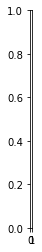

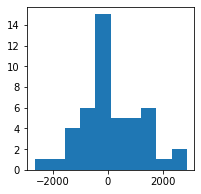

Count =  791
RMSE = 2247.0861231360063
Accuracy = 91.86919696511043%



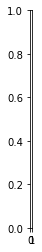

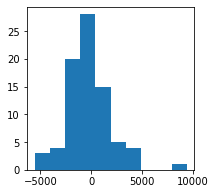

Count =  472
RMSE = 2789.104531688002
Accuracy = 90.4104872017247%



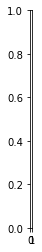

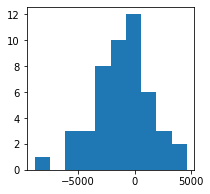

Count =  152
RMSE = 653.2879414089169
Accuracy = 92.9793939582887%



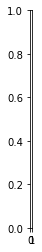

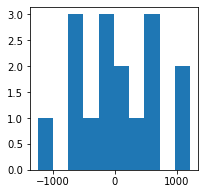

Count =  390
RMSE = 1855.7336701808217
Accuracy = 93.00488313672089%



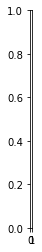

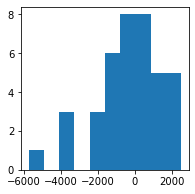

Count =  1571
RMSE = 936.2736315845012
Accuracy = 91.95596429116134%



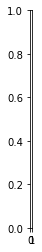

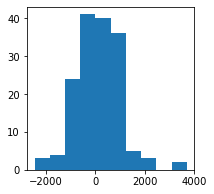

Count =  136
RMSE = 1002.6991701616835
Accuracy = 92.46832455017466%



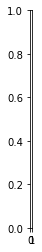

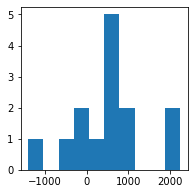

Count =  192
RMSE = 1835.5921088339912
Accuracy = 91.75007242196779%



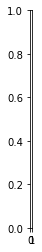

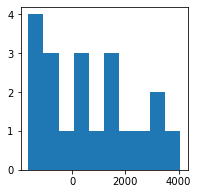

Count =  141
RMSE = 1591.8166123698666
Accuracy = 94.61376050960345%



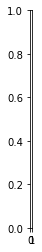

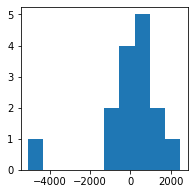

Count =  73
RMSE = 1852.6550381777092
Accuracy = 92.49243294146248%



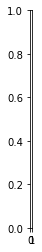

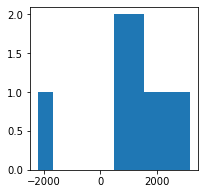

Count =  267
RMSE = 1532.2674826978573
Accuracy = 94.25956066785717%



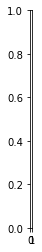

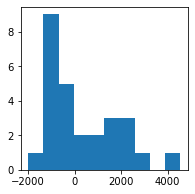

Count =  473
RMSE = 1279.2751837618673
Accuracy = 93.56659852616038%



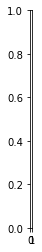

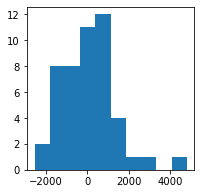

Count =  2122
RMSE = 806.2969724509828
Accuracy = 94.2554184515047%



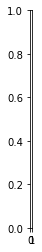

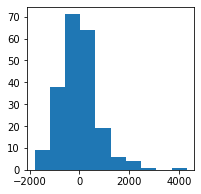

Count =  712
RMSE = 1141.8464116391876
Accuracy = 90.29082269202978%



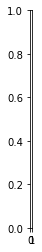

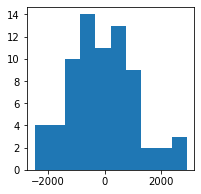

Count =  1961
RMSE = 732.1102873378107
Accuracy = 93.2378968758388%



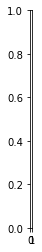

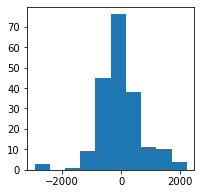

Count =  479
RMSE = 1655.7722528900272
Accuracy = 93.7168684394562%



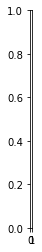

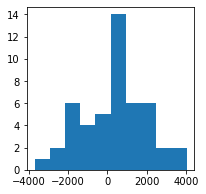

Count =  232
RMSE = 1620.8721434472398
Accuracy = 94.07686081953617%



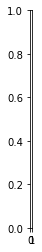

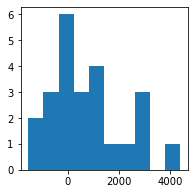

Count =  115
RMSE = 786.1394197933341
Accuracy = 93.44516536609008%



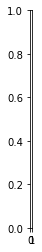

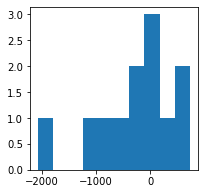

Count =  114
RMSE = 863.8993867081683
Accuracy = 92.77033685037037%



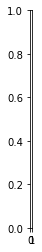

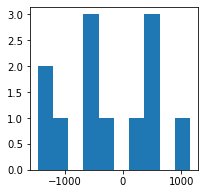

Count =  86
RMSE = 2946.0096522539884
Accuracy = 90.63762699137625%



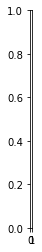

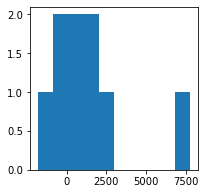

Count =  51
RMSE = 2883.1266583914594
Accuracy = 93.81362133509923%



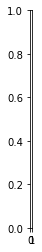

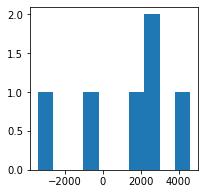

Count =  3441
RMSE = 856.2451961350649
Accuracy = 92.33148953272308%



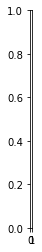

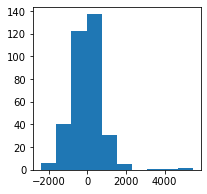

Count =  2805
RMSE = 950.8050191700125
Accuracy = 92.41143087314049%



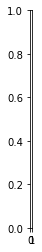

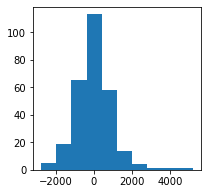

Count =  448
RMSE = 643.7069274444059
Accuracy = 93.67130125606144%



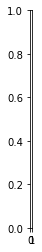

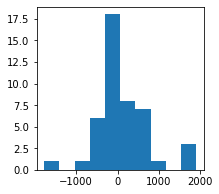

Count =  815
RMSE = 679.813556375922
Accuracy = 94.5178654210295%



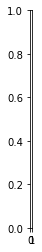

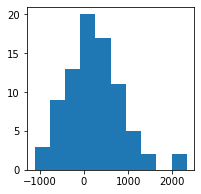

Count =  2127
RMSE = 1117.1797679244767
Accuracy = 93.88686228089678%



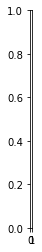

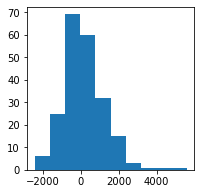

Count =  683
RMSE = 1185.1128494368534
Accuracy = 92.31567077554966%



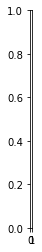

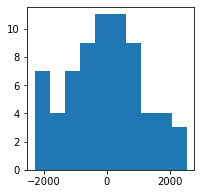

Count =  599
RMSE = 810.2384913077241
Accuracy = 91.51867445826504%



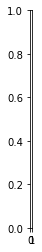

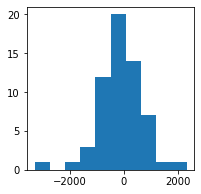

Count =  251
RMSE = 557.1208424474753
Accuracy = 90.96557236147348%



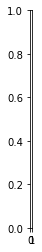

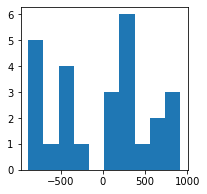

Count =  58
RMSE = 1160.1078280372617
Accuracy = 92.43831032967684%



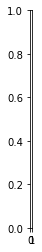

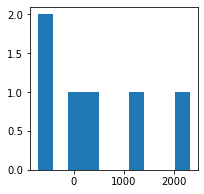

Count =  463
RMSE = 625.8431085450935
Accuracy = 94.30127249287156%



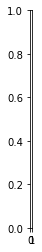

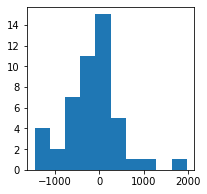

Count =  568
RMSE = 2229.429748244656
Accuracy = 91.48162690694909%



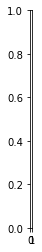

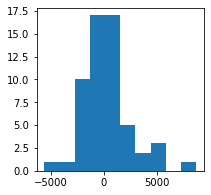

Count =  27
RMSE = 640.7929121567538
Accuracy = 91.95124457200504%



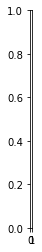

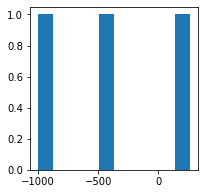

Count =  1030
RMSE = 1091.5723312663758
Accuracy = 92.74320489567819%



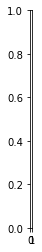

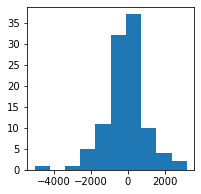

Count =  101
RMSE = 613.1975468077009
Accuracy = 93.81073339678123%



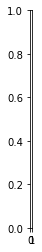

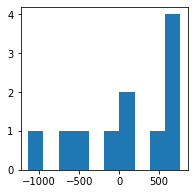

Count =  156
RMSE = 1750.506437944999
Accuracy = 90.93740268828908%



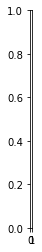

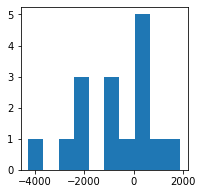

Count =  21
RMSE = 2933.656805567925
Accuracy = 78.92002670650227%



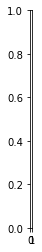

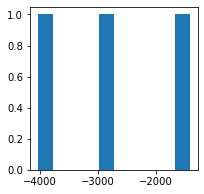

Count =  22
RMSE = 1026.2204958672378
Accuracy = 83.25737935961317%



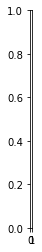

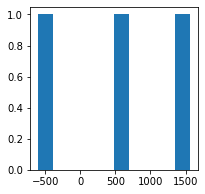

Count =  733
RMSE = 1690.2170226307092
Accuracy = 94.46587344166329%



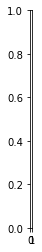

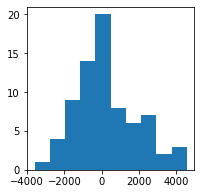

Count =  4863
RMSE = 1474.49965354413
Accuracy = 91.2435838268889%



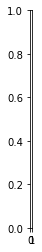

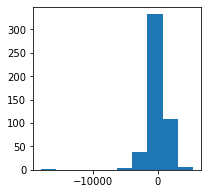

Count =  915
RMSE = 2201.941625587016
Accuracy = 91.34575499830578%



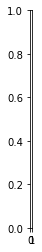

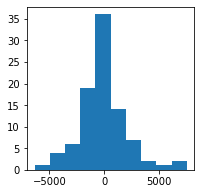

Count =  300
RMSE = 1463.7030099235262
Accuracy = 94.30682577663062%



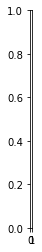

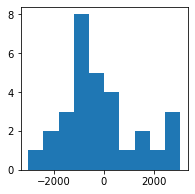

Count =  3287
RMSE = 794.692579152635
Accuracy = 94.27583029135351%



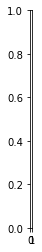

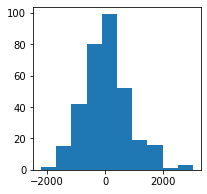

Count =  1765
RMSE = 2157.049745254735
Accuracy = 92.26751011471889%



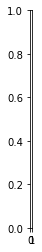

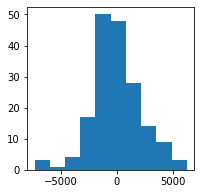

Count =  260
RMSE = 2155.8178843763844
Accuracy = 93.62610758178876%



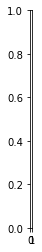

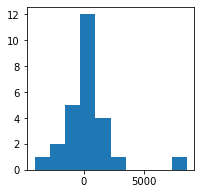

Count =  884
RMSE = 744.2724657425614
Accuracy = 92.72612842795446%



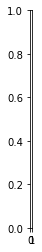

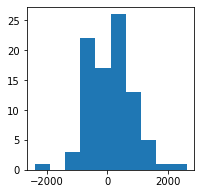

Count =  242
RMSE = 1097.7303394669711
Accuracy = 92.76939483310161%



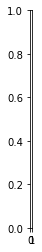

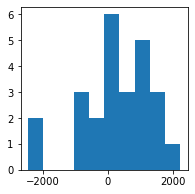

Count =  83
RMSE = 2396.677291469379
Accuracy = 75.5913188658586%



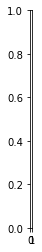

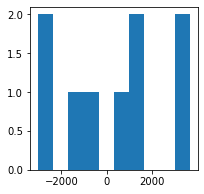

Count =  59
RMSE = 1951.9231280041292
Accuracy = 91.43261445062546%



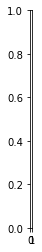

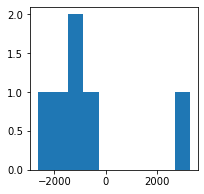

Count =  101
RMSE = 3616.7331751215856
Accuracy = 92.01589547754607%



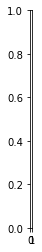

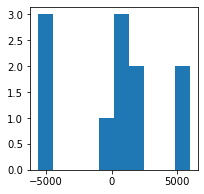

Count =  363
RMSE = 2626.899988191507
Accuracy = 94.15653129979115%



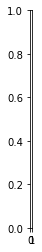

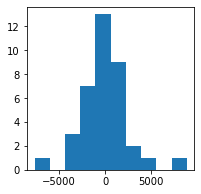

Count =  248
RMSE = 3006.0164172299324
Accuracy = 92.57392502131577%



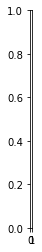

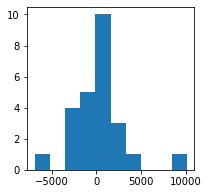

Count =  352
RMSE = 1836.2124652052719
Accuracy = 93.11079899983885%



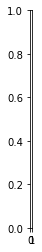

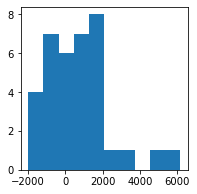

Count =  268
RMSE = 1145.9064950061247
Accuracy = 94.51024846965147%



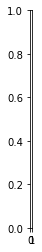

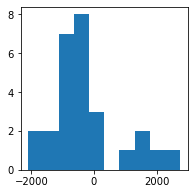

Count =  111
RMSE = 2487.9671618124185
Accuracy = 93.42637391408303%



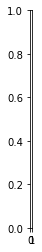

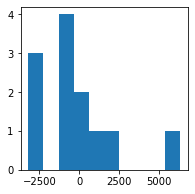

Count =  91
RMSE = 3473.3821010466345
Accuracy = 90.78850551621231%



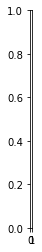

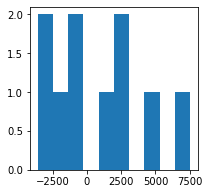

Count =  61
RMSE = 1101.2471913867867
Accuracy = 96.6541432214502%



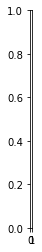

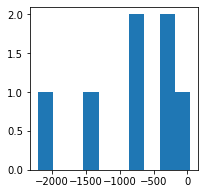

Count =  32
RMSE = 2059.47857910091
Accuracy = 82.77155038776253%



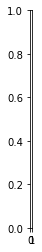

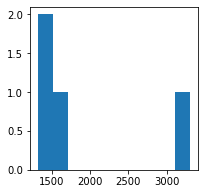

Count =  95
RMSE = 1161.152002888123
Accuracy = 91.36392657163503%



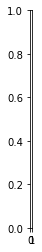

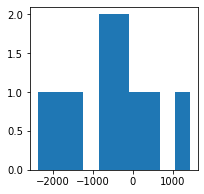

In [21]:
# делаем абсолютно то же самое для каждой модели автомобиля

RMSEs_rf = []
accuracies_rf = []

for i in range(len(models)):
    
    dtf = dfm[i]
    # создадим 2 массива: один с предсказываемой величиной, другой - с предсказывающими
    y = dtf['price'].to_numpy()
    # если количество автомобилей соответствующей модели будет очень мало (меньше 20), то модель будет плохо обучена
    if (len(y) < 20):
        continue
    colx = []
    for c in col:
        if (c != 'price' and c != 'model'):
            colx.append(c)
    # print(colx)
    x = dtf[colx].to_numpy()
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 0)

    rf = RandomForestRegressor(n_estimators = 1000, random_state = 0) # 1000 деревьев, ибо на большее питон не соглашается
    rf.fit(x_train, y_train);

    predictions = rf.predict(x_test)

    # вывод результата
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    print('Count = ', len(y))
    print("RMSE =", RMSE)
    
    errors = 100 * (abs(predictions - y_test) / y_test)
    acrc = 100 - np.mean(errors)
    print("Accuracy = ", acrc, '%', sep = '')
    print()
    RMSEs_rf.append(RMSE)
    accuracies_rf.append(acrc)
    
    plt.subplot(1, len(models), i + 1)
    plt.figure(figsize=(3, 3))
    plt.hist(y_test - predictions)
    plt.show()

In [15]:
print('Count = ', ss)
print("Mean RMSE =", sum(RMSEs_rf) / len(RMSEs_rf))
print('Mean accuracy = ', sum(accuracies_rf) / len(accuracies_rf), '%', sep = '')

Count =  108540
Mean RMSE = 2091.014899516766
Mean accuracy = 92.23822678513697%


точность предсказаний почти такая же, как и в предыдущем случае, и её можно списать на работу рандома

# Итоги: 
### что сделано:
- объединено 11 датасетов в 1;
- заменены отсутствующие данные на средние по столбцу;
- заменены строки на соответствующие числа;
- построены модели на основе случайного леса и линейной регрессии для большого датасета;
- для каждой модели автомобиля были созданы отдельные датасеты, и для каждого такого датасета построены также 2 модели - случайный лес и линейная регрессия;
- затем была подсчитана точность для каждого метода;
- проведён анализ результатов: 

|  лин. рег. (общий случай)  |  лин. рег. (для каждой модели авто)  |  лес (общий случай)  |  лес (для каждой модели авто) |
|:--------------------------:|:------------------------------------:|:--------------------:|:-----------------------------:|
| 74.47236324405907% | 88.2728107760178% | 92.81975402053203% | 92.23822678513697% |

Как видно, случайный лес намного точнее, чем линейная регрессия, и для него не важно, как анализировать данные - одним датасетом, или множеством (различие - 0,6%, что незначительно). Регрессия же менее точная, да и при работе с общим датасетом показывает результат хуже, чем при работе с датасетами для каждой модели авто. Однако, регрессия работает <big>намного быстрее</big>, чем лес.